In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Documents of SymPy for solving equations

#### https://docs.sympy.org/latest/modules/solvers/solvers.html

In [2]:
import sympy
from sympy.solvers import solve
from sympy import Symbol

In [3]:
x = Symbol('x')
ans = solve(x**3 + x + 10, x, numerical=True)

In [4]:
len(ans)

3

In [5]:
ans[1]

1 - 2*I

## Bessel functions from SciPy


##### 1. Bessel function of the first kind of real order and complex argument.

##### https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html#scipy.special.jv


##### 2. Bessel function of the second kind of real order and complex argument.

##### https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.yv.html#scipy.special.yv

In [6]:
import scipy
from scipy.special import jv
from scipy.special import yv

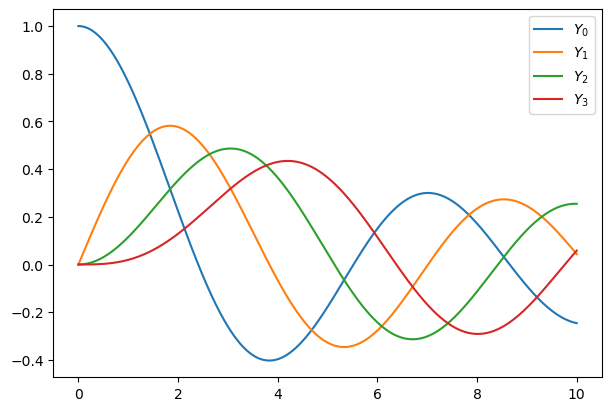

In [7]:
fig, ax = plt.subplots(figsize = (6, 4), constrained_layout=True)
x = np.linspace(0., 10., 1000)
for i in range(4):
    ax.plot(x, jv(i, x), label=f'$Y_{i!r}$')
# ax.set_ylim(-3, 1)
ax.legend()
plt.show()

## Define All twelve elements in the coefficient matrix of Eq. (11) in the paper 

#### Bessel functions from SymPy
##### https://docs.sympy.org/latest/modules/functions/special.html

In [8]:
from sympy import besselj, bessely
from sympy import I
from sympy.abc import a, b, z

mu = Symbol('mu')
lambda_ = Symbol('lambda')
kz_ = Symbol('kz')
omega_ = Symbol('omega')
cl_ = Symbol('cl')
ct_ = Symbol('ct')
kl_ = omega_/cl_
kt_ = omega_/ct_
klr = sympy.sqrt(kl_**2 - kz_**2)
ktr = sympy.sqrt(kt_**2 - kz_**2)

# klr = Symbol('klr')
# ktr = Symbol('ktr')
# r = Symbol('r')

J0klra= besselj(0, klr*a)
J0ktra= besselj(0, ktr*a)
J1klra= besselj(1, klr*a)
J1ktra= besselj(1, ktr*a)
J1klrb= besselj(1, klr*b)
J1ktrb= besselj(1, ktr*b)

Y0klra= bessely(0, klr*a)
Y0ktra= bessely(0, ktr*a)
Y1klra= bessely(1, klr*a)
Y1ktra= bessely(1, ktr*a)
Y1klrb= bessely(1, klr*b)
Y1ktrb= bessely(1, ktr*b)

In [9]:
M11 = -klr*J1klrb
M12 = -klr*Y1klrb
M13 = -kz_*ktr*J1ktrb*I
M14 = -kz_*ktr*Y1ktrb*I

In [10]:
M21 = -(lambda_*(klr**2+kz_**2)+2*mu*klr**2)*J0klra + 2*mu*klr*J1klra/a
M22 = -(lambda_*(klr**2+kz_**2)+2*mu*klr**2)*Y0klra + 2*mu*klr*Y1klra/a
M23 = 2*I*mu*ktr*kz_*(-ktr*J0ktra+J1ktra/a)
M24 = 2*I*mu*ktr*kz_*(-ktr*Y0ktra+Y1ktra/a)

In [11]:
M31 = -2*I*mu*klr*kz_*J1klra
M32 = -2*I*mu*klr*kz_*Y1klra
M33 = mu*ktr*(kz_**2-ktr**2)*J1ktra
M34 = mu*ktr*(kz_**2-ktr**2)*Y1ktra

In [12]:
M41 = -2*I*mu*klr*kz_*J1klrb
M42 = -2*I*mu*klr*kz_*Y1klrb
M43 = mu*ktr*(kz_**2-ktr**2)*J1ktrb
M44 = mu*ktr*(kz_**2-ktr**2)*Y1ktrb

In [13]:
# from sympy import bessely, yn
# cc = bessely(0, z)
# dd = bessely(1, z)

### Turn the determinant of the coefficient matrix into a function

In [14]:
# from sympy.abc import a, b, c, d
from sympy import Matrix, lambdify
mat = Matrix([[M11, M12, M13, M14], [M21, M22, M23, M24], [M31, M32, M33, M34], [M41, M42, M43, M44]]) 
determinant_00 = mat.det()
determinant_01 = lambdify((kz_, a, b, mu, lambda_, omega_, cl_, ct_), determinant_00)

In [15]:
mat

Matrix([
[                                                                                                              -sqrt(-kz**2 + omega**2/cl**2)*besselj(1, b*sqrt(-kz**2 + omega**2/cl**2)),                                                                                                               -sqrt(-kz**2 + omega**2/cl**2)*bessely(1, b*sqrt(-kz**2 + omega**2/cl**2)),                                                                                      -I*kz*sqrt(-kz**2 + omega**2/ct**2)*besselj(1, b*sqrt(-kz**2 + omega**2/ct**2)),                                                                                      -I*kz*sqrt(-kz**2 + omega**2/ct**2)*bessely(1, b*sqrt(-kz**2 + omega**2/ct**2))],
[(-2*mu*(-kz**2 + omega**2/cl**2) - lambda*omega**2/cl**2)*besselj(0, a*sqrt(-kz**2 + omega**2/cl**2)) + 2*mu*sqrt(-kz**2 + omega**2/cl**2)*besselj(1, a*sqrt(-kz**2 + omega**2/cl**2))/a, (-2*mu*(-kz**2 + omega**2/cl**2) - lambda*omega**2/cl**2)*bessely(0, a*sqrt(-kz**2 + omega**2/cl**

In [16]:
# from sympy import dsolve, symbols, Function
# KZ = symbols("KZ", cls=Function)
# kz_root = dsolve(determinant_00)

### Defined necessary constants

In [17]:
## Given an arbitrary angular frequency and mechanical properties
frequency = 1500 #np.arange(0.1, 10000, 50)
omega = frequency * 2 * np.pi
Young_molulus = 0.14*(10**9)
Poisson_ratio = 0.49
loss_factor = 0.23
rubber_den=1100
air_den=1.21

### Import defined equations for calculation

In [18]:
%run -i equations.py

In [19]:
## Assume cone shape
pcone = 2*0.001
qcone = 8*0.001
lh = 40*0.001
num_segments = 100
cell_radius = 15*0.001 

ai, _ = effective_radius(pcone, qcone, lh, num_segments, shape='cone')
effective_density = ith_effect_density(ai, cell_radius, rubber_den, air_den)

In [20]:
ai.shape

(100,)

In [21]:
## Calculate shear_modulus & longitudinal_modulus
shear_modulus = shear_m(Young_molulus, Poisson_ratio, loss_factor)
lame_constant = lame_const(Young_molulus, Poisson_ratio, loss_factor)
longitudinal_modulus = longitudinal_m(Young_molulus, Poisson_ratio, loss_factor)
shear_modulus

(46979865.77181208-10805369.127516778j)

### Defined necessary variables in eq.(f6) for solving eq.(f5) in the reference book Page 70-71 

In [22]:
## Calculate speed of longitudinal & speed of transverse
cl = ith_longitudinal_speed(longitudinal_modulus, effective_density)
ct = ith_transverse_speed(shear_modulus, effective_density)

In [23]:
cl.shape

(100,)

In [24]:
## kl: longitudinal wavenumber = omega / speed of longitudinal
## kt: transverse wavenumber = omega / speed of transverse
kl = omega/cl
kt = omega/ct

In [25]:
kl[-1]
cl[-1]

(1755.676287286536-199.3009828136468j)

## Solve the determinant equation of determinant numerically in Scipy...

In [26]:
determinant_01

<function _lambdifygenerated(kz, a, b, mu, lambda_, omega, cl, ct)>

In [27]:
from scipy.optimize import newton, fsolve
# root = newton(coefficient_matrix, kl*6, args=(omega, cl, ct, ai[0], cell_radius), tol=80, maxiter=10000)
kz_root = newton(determinant_01, kl[-1], args=(ai[-1], cell_radius, shear_modulus, lame_constant, omega, cl[-1], ct[-1]), tol=1.48e-12, maxiter=10000)

In [28]:
kz_root

(10.513238236804538+15.271465393744446j)

In [29]:
from cxroots import Circle
Circle?

Init signature: Circle(center: complex, radius: float)
Docstring:     
A positively oriented circle in the complex plane.

Parameters
----------
center : complex
    The center of the circle.
radius : float
    The radius of the circle.

Examples
--------
.. plot::
    :include-source:

    from cxroots import Circle
    circle = Circle(center=1, radius=0.5)
    circle.show()
File:           /opt/anaconda3/envs/complex_root/lib/python3.9/site-packages/cxroots/contours/circle.py
Type:           ABCMeta
Subclasses:     

In [36]:
root_range = Circle(0, 100)

In [31]:
determinant_02 = lambda kz: determinant_01(kz, ai[-1], cell_radius, shear_modulus, lame_constant, omega, cl[-1], ct[-1])

In [ ]:
roots = root_range.roots(determinant_02)

/opt/anaconda3/envs/complex_root/lib/python3.9/site-packages/cxroots/util.py:43: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_real, _ = scipy.integrate.quad(
/opt/anaconda3/envs/complex_root/lib/python3.9/site-packages/cxroots/util.py:46: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_imag, _ = scipy.integrate.quad(
/opt/anaconda3/envs/complex_root/lib/python3.9/site-packages/cxroots/util.py:43: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral_real, _ = scipy.integrate.quad(
/opt/anaconda3/envs/complex_root/lib/python3.9/site-packages/cxroots/util.py:46: IntegrationWarning: The occurrence of roundoff er

In [34]:
roots

RootResult(roots=[], multiplicities=[])

In [35]:
# C = Circle(0, 3)
# f = lambda z: (z + 1.2) ** 3 * (z - 2.5) ** 2 * (z + 1j)
# C.roots(f, verbose=True)

In [29]:
# import pychebfun
# ff = pychebfun.Chebfun.from_function(lambda x: x**7+2*x**5-4*x**4-1, domain=(-1000+1000j, 1000+10000j))
# ff.roots()
# f_cheb = pychebfun.Chebfun.from_function(lambda kz: determinant_01(kz, ai[-1], cell_radius, shear_modulus, lame_constant, omega, cl[-1], ct[-1]), 
#                                          domain=(-100-100j, 100+100j))
# f_cheb.roots()

In [ ]:
def axial_wavenumber(ai, cell_radius, shear_modulus, lame_constant, omega, cl, ct):
    kz = []
    kl = omega/cl
    x0 = kl[0]
    for i in range(ai.shape[0]):
        # x0 = kl[i]
        try:
            kz_root = newton(determinant_01, x0, 
                             args=(ai[i], cell_radius, shear_modulus, lame_constant, omega, cl[i], ct[i]), 
                             tol=1.48e-8, maxiter=10000)
            kz.append(kz_root)
            x0 = kz_root      
        
        except RuntimeError:
            kz = [i, ai[i]]
            break

    return np.asarray(kz)

In [ ]:
frequency = 500
kz_list = axial_wavenumber(ai, cell_radius, shear_modulus, lame_constant, omega, cl, ct)

In [ ]:
kz_list.shape

In [ ]:
frequency_array = np.arange(0.1, 10000, 100)
frequency_array.shape

In [ ]:
a = np.zeros((2,3))
a[0][:] = 56
a

In [ ]:
# wavenumer_array = np.zeros((frequency_array.shape[0], num_segments))
# i = 0
# for frequency in frequency_array:
#     omega = frequency * 2 * np.pi
#     kz = axial_wavenumber(ai, cell_radius, shear_modulus, lame_constant, omega, cl, ct)
#     wavenumer_array[i][:] = kz
#     i += 1

In [ ]:
def absorption_frequency(frequency_array, p, q, lh, num_segments, 
                         Young_m, Poisson_r, loss_factor, 
                         cell_radius, shape='cone', rubber_den=1100, air_den=1.21):
    
    frequency_array = np.asarray(frequency_array)
    absorption_list = []
    
    ai, _ = effective_radius(p, q, lh, num_segments, shape=shape)
    effective_density = ith_effect_density(ai, cell_radius, rubber_den, air_den)

    longitudinal_modulus = longitudinal_m(Young_m, Poisson_r, loss_factor)
    shear_modulus = shear_m(Young_molulus, Poisson_ratio, loss_factor)
    lame_constant = lame_const(Young_molulus, Poisson_ratio, loss_factor)

    # effective_speed = ith_longitudinal_speed(longitudinal_modulus, effective_density)
    cl = ith_longitudinal_speed(longitudinal_modulus, effective_density)
    ct = ith_transverse_speed(shear_modulus, effective_density)
    
    for frequency in frequency_array:
       
        omega = frequency * 2 * np.pi
        
        wave_number = axial_wavenumber(ai, cell_radius, shear_modulus, lame_constant, omega, cl, ct)
        print(f'Solving axial_wavenumber kz at {frequency = } is done.')
        
        effective_impedance = ith_effect_impedance(effective_density, omega, wave_number)
        tn = total_tran_matrix(wave_number, lh, num_segments, effective_impedance)

        ## Acoustic impdedance of water: 1.48 MPa.s.m−1
        ## https://www.animations.physics.unsw.edu.au/jw/sound-impedance-intensity.htm

        zw = 998*1483
        zf = imped_front(tn)
        ref = reflection_coefficient(zf, zw)
        alpha = absorption_coefficient(ref)   
        absorption_list.append(alpha)
        
    return np.asarray(absorption_list)

In [ ]:
frequency_array = np.arange(0.1, 10000, 500)
try: 
    absorption_array = absorption_frequency(frequency_array, 4*0.001, 8*0.001, 40*0.001, 10,
                                            0.014*(10**9), 0.49, 0.23, 
                                            15*0.001, shape='cone')
except ValueError:
    print(f'RuntimeError occurred and cannot converge at {frequency = }, {wave_number = }')

In [ ]:
rows = 1
cols = 1
f1, ax1 = plt.subplots(rows, cols, figsize = (6, 4), constrained_layout=True)
ax1.plot(frequency_array, absorption_array)
# plt.show()

In [ ]:
# from mpmath import findroot
# from mpmath.calculus.optimization import Secant

# # def F2(x):
# #     global a,b
# #     parameters=list([a,b])
# #     args=tuple(x)+tuple(parameters)
# #     return F1(*args)

# def determinant_02(kz):
#     global ai, cell_radius, shear_modulus, lame_constant, omega, cl, ct
#     parameters=list(ai[0], cell_radius, shear_modulus, lame_constant, omega, cl, ct)
#     args=tuple(kz)+tuple(parameters)
#     return determinant(*args)

In [ ]:
# from sympy.abc import x
# matt = Matrix([[x, -1], [1, x]])
# dd = matt.det()
# ddd = lambdify((x), dd)
# # rr = fsolve(ddd, 1-1*1j, maxfev=1000)

# from sympy.solvers import solve, nsolve
# dd

In [ ]:
# beta = (kt**2)/(2*(kl**2))
# y = lambda kz: kz**2/(kl**2)
# epsilon = cell_radius/ai[0]

In [ ]:
# def coefficient_matrix(kz, omega, cl, ct, ai, cell_radius):
#     kl = omega/cl
#     kt = omega/ct
#     klr = (kl**2 - kz**2)**0.5
#     ktr = (kt**2 - kz**2)**0.5
#     beta = (kt**2)/(2*(kl**2))
#     y = kz**2/(kl**2)
#     epsilon = cell_radius/ai
#     def theta(k, epsilon):
#         ii = jv(1, k)*yv(0, epsilon*k) - yv(1, k)*jv(0, epsilon*k)
#         jj = jv(1, k)*yv(1, epsilon*k) - yv(1, k)*jv(1, epsilon*k)
#         return epsilon*k*(ii/jj)
#     simple_eq = ((beta-y)**2)*theta(klr, epsilon)+y*(1-y)*theta(ktr, epsilon)-(1-y)*beta
#     return simple_eq